# Regression with a Flood Prediction Dataset

<b>Kaggle's Explonation:</b> <br>
Your Goal: The goal of this competition is to predict the probability of a region flooding based on various factors.<br>
<i>You can read it in [its original website](https://www.kaggle.com/competitions/playground-series-s4e5).</i>

<b>My Explonation</b>: In this project I will try to predict floods' amounts. I will use both classical machine learning and deep learning.<br>
Disasters damage people and their life. Predicting the magnitude of the disasters can minimizes damage. That's why using machine learning is very important and will be more important.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
ss=pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")
train=pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [3]:
ss.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


In [4]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [6]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [7]:
test.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

<Axes: >

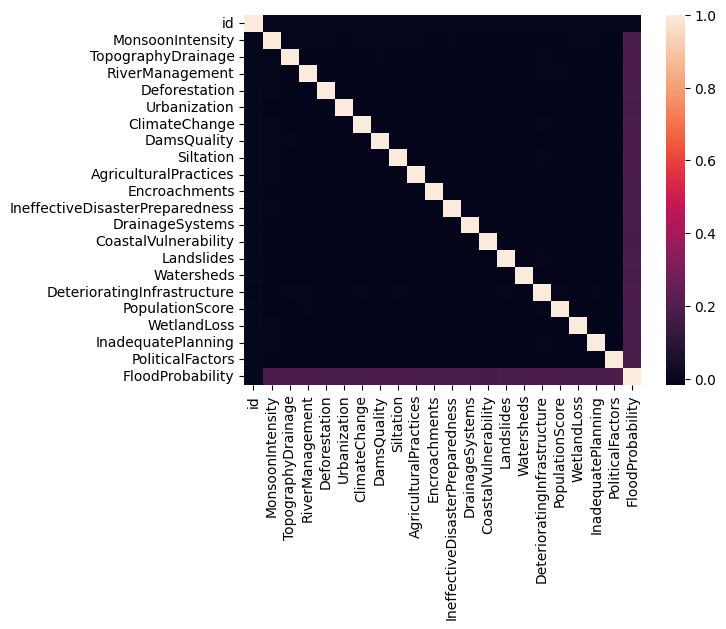

In [8]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

In [9]:
abs(train.corr(numeric_only=True)["FloodProbability"]).sort_values(ascending=False)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
id                                 0.000184
Name: FloodProbability, dtype: f

In [10]:
columns_to_keep = [
    'FloodProbability',
    'DeterioratingInfrastructure',
    'MonsoonIntensity',
    'DamsQuality',
    'TopographyDrainage',
    'RiverManagement',
    'Siltation',
    'PopulationScore',
    'Landslides'
]
train=train[columns_to_keep]

In [11]:
c_to_keep= ['DeterioratingInfrastructure',
    'MonsoonIntensity',
    'DamsQuality',
    'TopographyDrainage',
    'RiverManagement',
    'Siltation',
    'PopulationScore',
    'Landslides'
]
test=test[c_to_keep]

In [12]:
#This is a function that try to find the best classical machine learning algorithm for the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
    
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [13]:
x=train.drop('FloodProbability',axis=1)
y=train['FloodProbability']

In [14]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Ridge,2.977772e-01,0.042723,0.034487
Linear,2.977772e-01,0.042723,0.034487
XGBRegressor,2.971909e-01,0.042741,0.034449
Gradient Boosting,2.913525e-01,0.042918,0.034657
KNeighborsRegressor,1.608765e-01,0.046702,0.037502
Lasso,-2.041849e-10,0.050983,0.040892
ElasticNet,-2.041849e-10,0.050983,0.040892
Extra Tree,-4.808724e-01,0.062042,0.049634
Decision Tree,-4.943604e-01,0.062324,0.049819


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

2024-05-26 10:17:09.800442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 10:17:09.800609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 10:17:09.961616: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
model=Sequential()
model.add(Dense(120, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(30, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [17]:
history=model.fit(x,y,validation_split=0.2,epochs=15,batch_size=32,verbose=1)

Epoch 1/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 2/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 3/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 4/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 5/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 6/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 7/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 8/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 9/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 10/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 11/15
27949/27949 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 0.0019 - val_loss: 0.00

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
prediction=model.predict(x_test)

print(r2_score(y_test,prediction))
print(mean_squared_error(y_test,prediction)**.5)
print(mean_absolute_error(y_test,prediction))

6988/6988 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
0.0214633476868048
0.050432991659550175
0.040634805472423936


In [19]:
predictions=model.predict(test)

23291/23291 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step


In [20]:
test["FloodProbability"]=predictions

In [21]:
test.head()

,DeterioratingInfrastructure,MonsoonIntensity,DamsQuality,TopographyDrainage,RiverManagement,Siltation,PopulationScore,Landslides,FloodProbability
0,3,4,8,6,3,7,6,5,0.490773
1,1,4,4,4,2,7,7,4,0.469585
2,2,1,4,3,6,6,3,5,0.452327
3,6,2,4,4,4,3,4,6,0.458770
4,6,6,5,3,2,5,8,6,0.488086


In [25]:
submission=pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")
submission=submission["id"]

In [27]:
submission=pd.DataFrame(submission)

In [28]:
submission["FloodProbability"]=test["FloodProbability"]
submission.head()

,id,FloodProbability
0,1117957,0.490773
1,1117958,0.469585
2,1117959,0.452327
3,1117960,0.458770
4,1117961,0.488086


In [29]:
submission.to_csv("submission.csv",index=False)

In [30]:
loss_f=pd.DataFrame(history.history)

<Axes: >

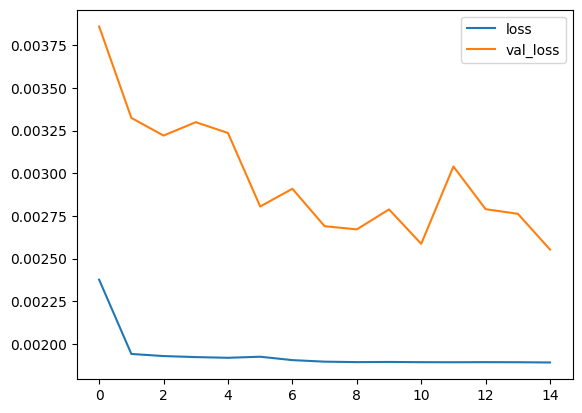

In [31]:
loss_f.plot()

In [32]:
model.save("model.h5")

My metrics are not satisfactory. The biggest factor is my data's correlation. But metrics are not enough to understand models' performance. That's why I will write a Streamlit app.